In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [219]:
df = pd.read_csv('drive/MyDrive/Heart_Disease_Prediction.csv')

In [220]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [221]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [204]:
df["Heart Disease"].unique() 

array(['Presence', 'Absence'], dtype=object)

In [205]:
cleanup_nums = {"Heart Disease":   {"Absence": 0, "Presence": 1}}
df = df.replace(cleanup_nums)

In [206]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [207]:
categorical_features = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "ST depression", "Number of vessels fluro", "Thallium","Heart Disease"]
df[categorical_features] = df[categorical_features].astype("category")

In [208]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [209]:
continuous_features = set(df.columns) - set(categorical_features)
scaler = MinMaxScaler()
X = df.drop("Heart Disease", axis=1)
X[list(continuous_features)] = scaler.fit_transform(df[list(continuous_features)])

In [210]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,0.854167,1,4,0.339623,0.447489,0,2,0.290076,0,2.4,0.5,3,3
1,0.791667,0,3,0.198113,1.000000,0,2,0.679389,0,1.6,0.5,0,7
2,0.583333,1,2,0.283019,0.308219,0,0,0.534351,0,0.3,0.0,0,7
3,0.729167,1,4,0.320755,0.312785,0,0,0.259542,1,0.2,0.5,1,7
4,0.937500,0,2,0.245283,0.326484,0,2,0.381679,1,0.2,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1,3,0.735849,0.166667,1,0,0.694656,0,0.5,0.0,0,7
266,0.312500,1,2,0.245283,0.312785,0,0,0.778626,0,0.0,0.0,0,7
267,0.562500,0,2,0.433962,0.383562,0,2,0.625954,0,1.3,0.5,0,3
268,0.583333,1,4,0.433962,0.150685,0,0,0.587786,0,0.4,0.5,0,6


# Метод k-средних

In [168]:
X1 = X

In [169]:
print(X1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      270 non-null    float64 
 1   Sex                      270 non-null    category
 2   Chest pain type          270 non-null    category
 3   BP                       270 non-null    float64 
 4   Cholesterol              270 non-null    float64 
 5   FBS over 120             270 non-null    category
 6   EKG results              270 non-null    category
 7   Max HR                   270 non-null    float64 
 8   Exercise angina          270 non-null    category
 9   ST depression            270 non-null    category
 10  Slope of ST              270 non-null    float64 
 11  Number of vessels fluro  270 non-null    category
 12  Thallium                 270 non-null    category
dtypes: category(8), float64(5)
memory usage: 15.2 KB
None


In [102]:
from sklearn.cluster import KMeans
import seaborn as sns

In [103]:
kmeans = KMeans(n_clusters=2)

In [170]:
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
y_kmeans

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1], dtype=int32)

In [171]:
X1['cluster'] = y_kmeans
X1

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,cluster
0,0.854167,1,4,0.339623,0.447489,0,2,0.290076,0,2.4,0.5,3,3,1
1,0.791667,0,3,0.198113,1.000000,0,2,0.679389,0,1.6,0.5,0,7,0
2,0.583333,1,2,0.283019,0.308219,0,0,0.534351,0,0.3,0.0,0,7,0
3,0.729167,1,4,0.320755,0.312785,0,0,0.259542,1,0.2,0.5,1,7,0
4,0.937500,0,2,0.245283,0.326484,0,2,0.381679,1,0.2,0.0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1,3,0.735849,0.166667,1,0,0.694656,0,0.5,0.0,0,7,0
266,0.312500,1,2,0.245283,0.312785,0,0,0.778626,0,0.0,0.0,0,7,0
267,0.562500,0,2,0.433962,0.383562,0,2,0.625954,0,1.3,0.5,0,3,1
268,0.583333,1,4,0.433962,0.150685,0,0,0.587786,0,0.4,0.5,0,6,0


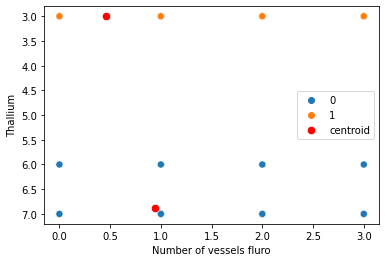

In [172]:
sns.scatterplot(x = X1["Number of vessels fluro"], y =X1.Thallium, s = 50, c = X1.cluster, marker = "o", hue = X1.cluster)
sns.scatterplot(x = centers[:,11], y = centers[:,12], marker="o", color='r', s = 70, label="centroid")

In [173]:
print(df["Heart Disease"].value_counts())
print(X1["cluster"].value_counts())

0    150
1    120
Name: Heart Disease, dtype: int64
1    152
0    118
Name: cluster, dtype: int64


In [174]:
X1["isSame"] = df["Heart Disease"] == X1["cluster"]

In [175]:
X1

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,cluster,isSame
0,0.854167,1,4,0.339623,0.447489,0,2,0.290076,0,2.4,0.5,3,3,1,True
1,0.791667,0,3,0.198113,1.000000,0,2,0.679389,0,1.6,0.5,0,7,0,True
2,0.583333,1,2,0.283019,0.308219,0,0,0.534351,0,0.3,0.0,0,7,0,False
3,0.729167,1,4,0.320755,0.312785,0,0,0.259542,1,0.2,0.5,1,7,0,True
4,0.937500,0,2,0.245283,0.326484,0,2,0.381679,1,0.2,0.0,1,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1,3,0.735849,0.166667,1,0,0.694656,0,0.5,0.0,0,7,0,True
266,0.312500,1,2,0.245283,0.312785,0,0,0.778626,0,0.0,0.0,0,7,0,True
267,0.562500,0,2,0.433962,0.383562,0,2,0.625954,0,1.3,0.5,0,3,1,False
268,0.583333,1,4,0.433962,0.150685,0,0,0.587786,0,0.4,0.5,0,6,0,True


In [176]:
X1["isSame"] = X1["isSame"].astype("category")

In [177]:
cleanup_nums = {"isSame":   {"False": 0, "True": 1}}
X1 = X1.replace(cleanup_nums)

In [178]:
print(X1["isSame"].value_counts())

False    206
True      64
Name: isSame, dtype: int64


In [79]:
 206/270

0.762962962962963

# Метод кластеризации на основе плотности DBSCAN

In [211]:
X2 = X

In [212]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [213]:
dbscan = DBSCAN()
dbscan.fit(X2)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Уменьшаем размерность при помощи метода главных компонент

In [214]:
pca = PCA(n_components=2).fit(X2)
pca_2d = pca.transform(X2)

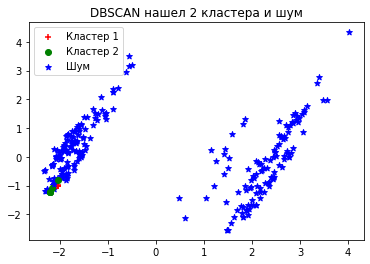

In [215]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

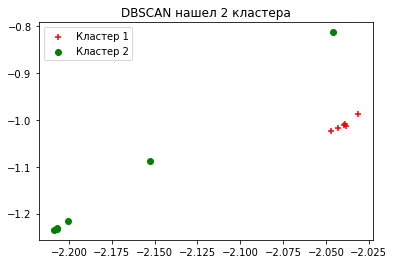

In [216]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2'])
plt.title('DBSCAN нашел 2 кластера')
plt.show()